<a href="https://colab.research.google.com/github/olavvn/Visualization_of_Revenue_Data_of_Circus_Maximus/blob/main/Visualization_of_Revenue_Data_of_Circus_Maximus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA Topic : Revenue of "Circus Maximus Tour(by Travis Scott)" per city
The Circus Maximus Tour, also branded and promoted as Utopia Tour Presents Circus Maximus, is the ongoing fourth concert tour by American rapper and singer Travis Scott, in support of his fourth studio album, Utopia (2023).

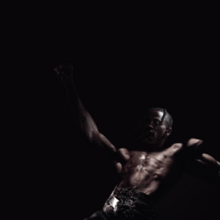

This album achieved great commercial success.

> In the United States, Utopia debuted at number one on Billboard 200 chart, earning 496,000 album-equivalent units (including 252,000 in pure album sales) in its first week. This became Scott's fourth album to top the chart and the third that he was credited for. The album also accumulated a total of 330.68 million on-demand streams of the album's songs. All 19 songs from the album debuted in the Billboard Hot 100, making Scott the 15th artist in the chart's history to log over 100 career entries. The album moved a total of 1,085,000 album-equivalent units in its first five weeks in the US.-wikipedia/Utopia(2023)





Travis Scott concerts are known for being raucous and rowdy. That is a reason why many hiphop fans all over the world want to join his concert. Last year's tour was also a hot topic. In particular, the video of enthusiasts when the title track, "Fein," was played spread through the hip-hop community.
https://www.youtube.com/watch?v=jkZiJiSRv3c&ab_channel=DanieleLombardo

In this backdrop, I wanted to examine the scale of the tour, and worked on visualizing "revenues" by city.

In [ ]:
#version3
import pandas as pd
url = 'https://en.wikipedia.org/wiki/Circus_Maximus_Tour'
tables = pd.read_html(url)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
dataFrame = tables[1]

In [ ]:
del dataFrame['Opening act']
del dataFrame['Country']
dF = dataFrame.dropna()
dF.index.name = "Circus Maximus Tour 2023 by Travis Scott"

In [ ]:
dF['Revenue'] = dF['Revenue'].replace('[\$,]', '', regex=True).astype(float)
dF['Attendance'] = dF['Attendance'].str.split(' ').str[0]
dF['Attendance'] = dF['Attendance'].replace('[\,,]', '', regex=True).astype(int)

In [ ]:
import requests

def get_coordinate(city):
    base_url = "https://nominatim.openstreetmap.org/search"
    params = {
        "q": city,
        "format": "jsonv2",
        "limit": 1
    }
    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        data = response.json()
        if data:
            return float(data[0]['lat']), float(data[0]['lon'])
    return None, None

coordinates = [get_coordinate(city) for city in dF['City']]

In [ ]:
coordinates

[(35.2272086, -80.8430827),
 (32.7762719, -96.7968559),
 (32.7762719, -96.7968559),
 (33.4484367, -112.074141),
 (33.4484367, -112.074141),
 (36.1672559, -115.148516),
 (37.8044557, -122.271356),
 (37.8044557, -122.271356),
 (33.9562003, -118.353132),
 (47.6038321, -122.330062),
 (45.5202471, -122.674194),
 (36.1563122, -95.9927516),
 (25.7741728, -80.19362),
 (36.1622767, -86.7742984),
 (39.2908816, -76.610759),
 (40.6526006, -73.9497211),
 (40.6526006, -73.9497211),
 (40.7127281, -74.0060152),
 (42.3554334, -71.060511),
 (40.735657, -74.1723667),
 (43.6534817, -79.3839347)]

In [ ]:
dF['Coordinate'] = coordinates

In [ ]:
dF.head()

,Date (2023),City,Venue,Attendance,Revenue,Coordinate
Circus Maximus Tour 2023 by Travis Scott,,,,,,
0,October 11,Charlotte,Spectrum Center,15702,1576716.0,"(35.2272086, -80.8430827)"
2,October 17,Dallas,American Airlines Center,27497,3588066.0,"(32.7762719, -96.7968559)"
3,October 18,Dallas,American Airlines Center,27497,3588066.0,"(32.7762719, -96.7968559)"
6,October 25,Phoenix,Footprint Center,29312,3737225.0,"(33.4484367, -112.074141)"
7,October 26,Phoenix,Footprint Center,29312,3737225.0,"(33.4484367, -112.074141)"


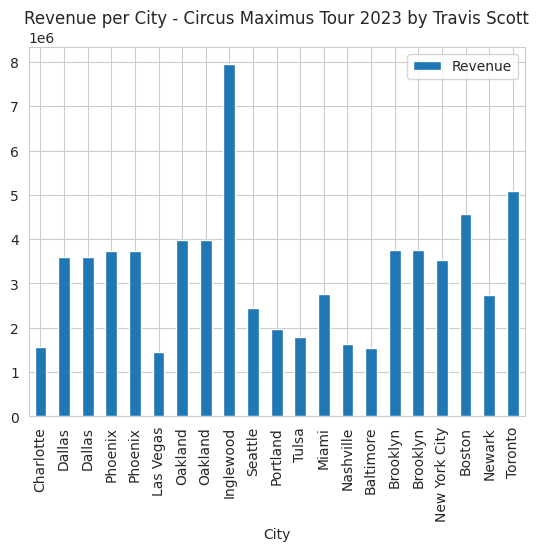

In [ ]:
dF.plot(kind="bar", x = 'City', y = 'Revenue')
plt.title("Revenue per City - Circus Maximus Tour 2023 by Travis Scott")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


x = dF['City']
x_to_int = {val: idx for idx, val in enumerate(x)}
x_int = [x_to_int[val] for val in x]
y = dF['Attendance']
z = dF['Revenue']

dx = np.ones(len(y)) * 0.5
dy = np.ones(len(y)) * 0.5
dz = dF['Revenue']

fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111, projection='3d')

ax.bar3d(x_int, y, z, dx, dy, dz)
ax.bar3d

ax.set_xticks(range(len(x)))
ax.set_xticklabels(x)

ax.set_xlabel('City')
ax.set_ylabel('Attandance')
ax.set_zlabel('Revenue')

plt.title("Revenue of Circus Maximus Tour 2023 by Travis Scott")
plt.show()

In [ ]:
import folium
from folium.plugins import MarkerCluster
from folium.map import LayerControl, Layer

m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)
custom_script = """
    <div id='map_title' style='position: fixed; top: 150px; left: 50%; transform: translateX(-50%); background-color: rgba(255,255,255,0.8); padding: 8px; z-index: 9999;'>
        <h2>Circus Maximus Tour 2023 by Travis Scott</h2>
    </div>
    """
m.get_root().html.add_child(folium.Element(custom_script))
marker_cluster = MarkerCluster().add_to(m)
for idx, row in dF.iterrows():
    folium.Marker(location=row['Coordinate'], popup=f"{row['City']}").add_to(marker_cluster)

for idx, row in dF.iterrows():
    folium.CircleMarker(
        location=row['Coordinate'],
        radius=row['Revenue'] / 100000,
        popup=f"City: {row['City']}<br>Attendance: {row['Attendance']}<br>Revenue: {row['Revenue']}",
        fill=True,
        color='blue',
        fill_opacity=0.7
    ).add_to(m)



m.save('map_visualization.html')

In [ ]:
m